# Tugas

## K-Means

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Buatlah sebuah model K-Means dengan ketentuan,

1. Gunakan data 'Mall_Customers.csv'
2. Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2)
3. Buatlah model K-Means dengan mempertimbangkan jumlah k yang terbaik.

In [ ]:
# Decide
# Fitur Selection ke Age, Annual Income, Spending Score
X_kmeans = df.iloc[:, 3:5]
X_kmeans.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


k=1; SSE=269981.28000000014
k=2; SSE=183653.3289473683
k=3; SSE=106348.37306211119
k=4; SSE=73880.64496247198
k=5; SSE=44448.45544793369
k=6; SSE=40825.16946386947
k=7; SSE=33642.57922077922
k=8; SSE=26686.837785187785
k=9; SSE=24766.471609793436
k=10; SSE=23103.122085983905


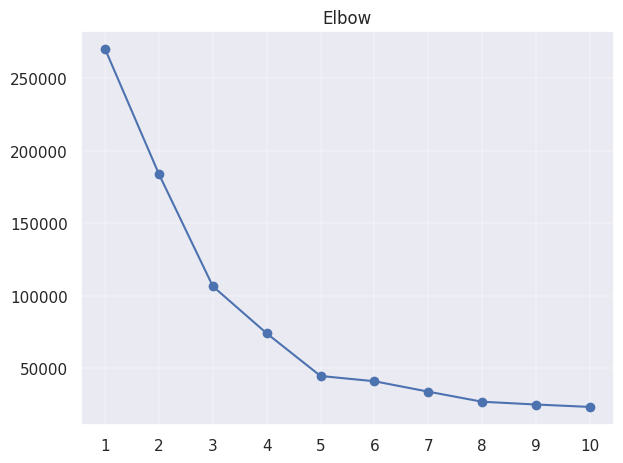

In [ ]:
from sklearn.cluster import KMeans

inertia = []
K_range = range(1, 11)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_kmeans)
    inertia.append(km.inertia_)
for idx, sse_val in enumerate(inertia, start=1):
    print(f'k={idx}; SSE={sse_val}')

plt.plot(K_range, inertia, marker='o')
plt.xticks(K_range)
plt.title("Elbow")
plt.grid(True, linewidth=0.3)
plt.tight_layout()
plt.show()

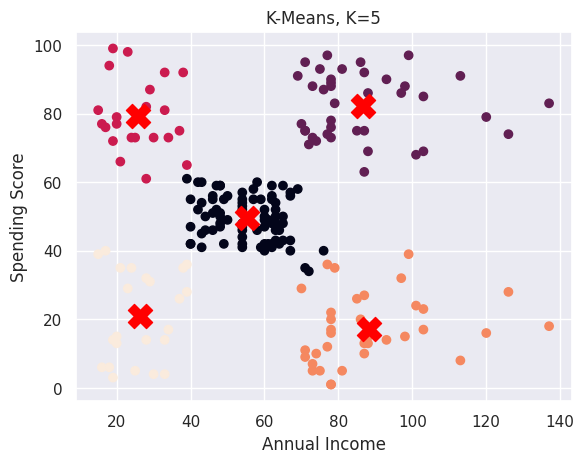

In [ ]:
k_optimal = 5
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
labels_kmeans = kmeans.fit_predict(X_kmeans)

plt.scatter(X_kmeans.iloc[:, 0], X_kmeans.iloc[:, 1], c=labels_kmeans)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X')
plt.title(f'K-Means, K={k_optimal}')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

## DBScan

In [ ]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)
X = StandardScaler().fit_transform(X)

In [ ]:
db = DBSCAN(eps=0.2, min_samples=5)
labels = db.fit_predict(X)

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print("Jumlah klaster:", n_clusters)
print("Jumlah noise:", n_noise)

Jumlah klaster: 2
Jumlah noise: 0


In [ ]:
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, adjusted_mutual_info_score, silhouette_score

mask = labels != -1
hom = homogeneity_score(y[mask], labels[mask])
comp = completeness_score(y[mask], labels[mask])
v_m = v_measure_score(y[mask], labels[mask])
ari = adjusted_rand_score(y[mask], labels[mask])
ami = adjusted_mutual_info_score(y[mask], labels[mask])
sil = silhouette_score(X[mask], labels[mask])

print("Homogeneity:", hom)
print("Completeness:", comp)
print("V-measure:", v_m)
print("ARI:", ari)
print("AMI:", ami)
print("Silhouette:", sil)

Homogeneity: 1.0
Completeness: 1.0
V-measure: 1.0
ARI: 1.0
AMI: 1.0
Silhouette: 0.3911598537138403


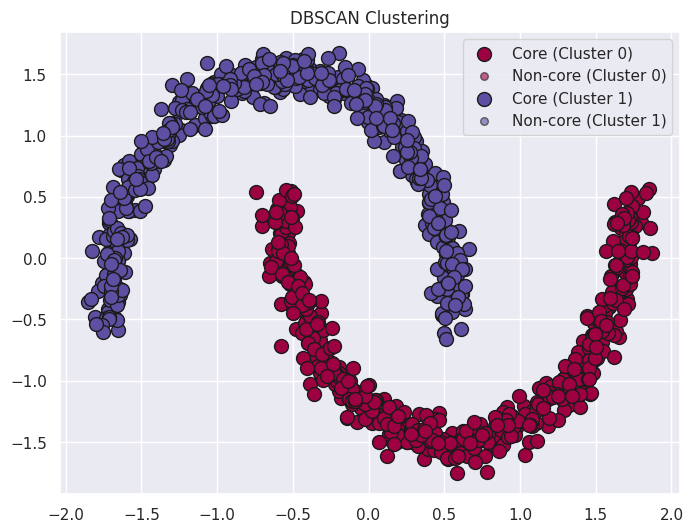

In [ ]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

plt.figure(figsize=(8, 6))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    # Core samples
    xy = X[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=[col], s=100, edgecolors='k', label=f'Core (Cluster {k})' if k != -1 else 'Noise')

    # Non-core samples
    xy = X[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=[col], s=30, edgecolors='k', alpha=0.6, label=f'Non-core (Cluster {k})' if k != -1 else '')

gca_handles, gca_labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(gca_labels, gca_handles))
plt.legend(by_label.values(), by_label.keys())

plt.title('DBSCAN Clustering')
plt.show()

In [ ]:
results = []

eps_values = [0.05, 0.1, 0.3, 0.5]
min_samples_values = [3, 10, 20]

for eps in eps_values:
    for min_samples in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_samples)
        labels = db.fit_predict(X)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)

        if n_clusters > 1:
            mask = labels != -1
            sil = silhouette_score(X[mask], labels[mask])
            hom = homogeneity_score(y[mask], labels[mask])
            ari = adjusted_rand_score(y[mask], labels[mask])
        else:
            sil = hom = ari = np.nan

        results.append({
            'eps': eps,
            'min_samples': min_samples,
            'clusters': n_clusters,
            'noise': n_noise,
            'silhouette': sil,
            'homogeneity': hom,
            'ARI': ari
        })

results_df = pd.DataFrame(results)
print(results_df)

     eps  min_samples  clusters  noise  silhouette  homogeneity       ARI
0   0.05            3        69    186    0.349166          1.0  0.044571
1   0.05           10         3    970    0.880676          1.0  0.000000
2   0.05           20         0   1000         NaN          NaN       NaN
3   0.10            3         2     14    0.393924          1.0  1.000000
4   0.10           10         7     57    0.209685          1.0  0.588678
5   0.10           20         6    850    0.787331          1.0  0.245068
6   0.30            3         2      0    0.391160          1.0  1.000000
7   0.30           10         2      0    0.391160          1.0  1.000000
8   0.30           20         2      0    0.391160          1.0  1.000000
9   0.50            3         2      0    0.391160          1.0  1.000000
10  0.50           10         2      0    0.391160          1.0  1.000000
11  0.50           20         2      0    0.391160          1.0  1.000000


# Hasil Pencarian Artikel
Paper yang ditemukan:
https://iopscience.iop.org/article/10.1088/1742-6596/1783/1/012027/pdf#page=6.40

COVID-19 Cases and Deaths in Southeast Asia Clustering using K-Means Algorithm (2020)

Link ke Dataset yang relevan: https://www.who.int/emergencies/diseases/novel-coronavirus-2019/situation-reports/situation-reports-archive

Riset dilakukan tahun 2020, dan link 'tidak sesuai' karena sekarang data di arsip. Data juga ada dalam bentuk PDF, maka harus secara manual di konfigurasi menjadi file csv.

In [ ]:
# IMPORT EVERYTHING
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/CovidDataset.csv')
df.head()

,date,location,total_cases,total_deaths
0,2020-04-01,Brunei Darussalam,129,1
1,2020-04-01,Cambodia,109,0
2,2020-04-01,Indonesia,1528,136
3,2020-04-01,Laos,9,0
4,2020-04-01,Malaysia,2766,43


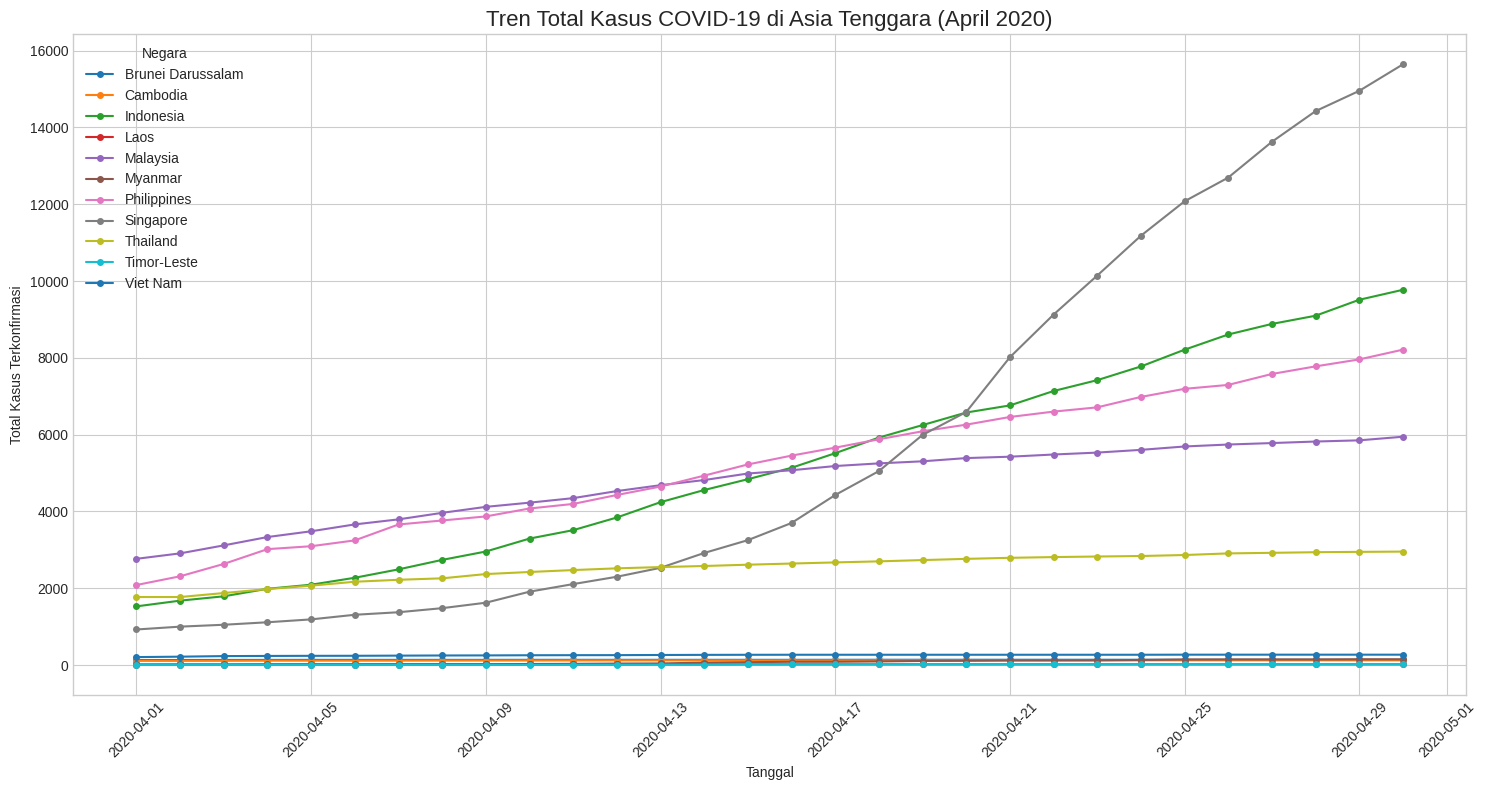

In [ ]:
df['date'] = pd.to_datetime(df['date'])
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(15, 8))

for country in df['location'].unique():
    country_df = df[df['location'] == country]
    plt.plot(country_df['date'], country_df['total_cases'], marker='o', linestyle='-', label=country, markersize=4)

plt.title('Tren Total Kasus COVID-19 di Asia Tenggara (April 2020)', fontsize=16)
plt.xlabel('Tanggal')
plt.ylabel('Total Kasus Terkonfirmasi')
plt.xticks(rotation=45)
plt.legend(title='Negara')
plt.tight_layout()
plt.show()

             location  kasus_maksimal  kematian_maksimal  pertumbuhan_kasus
0   Brunei Darussalam             138                  1                  9
1            Cambodia             122                  0                 13
2           Indonesia            9771                784               8243
3                Laos              19                  0                 10
4            Malaysia            5945                100               3179
5             Myanmar             150                  6                135
6         Philippines            8212                558               6128
7           Singapore           15641                 14              14715
8            Thailand            2954                 54               1183
9         Timor-Leste              24                  0                 23
10           Viet Nam             270                  0                 63


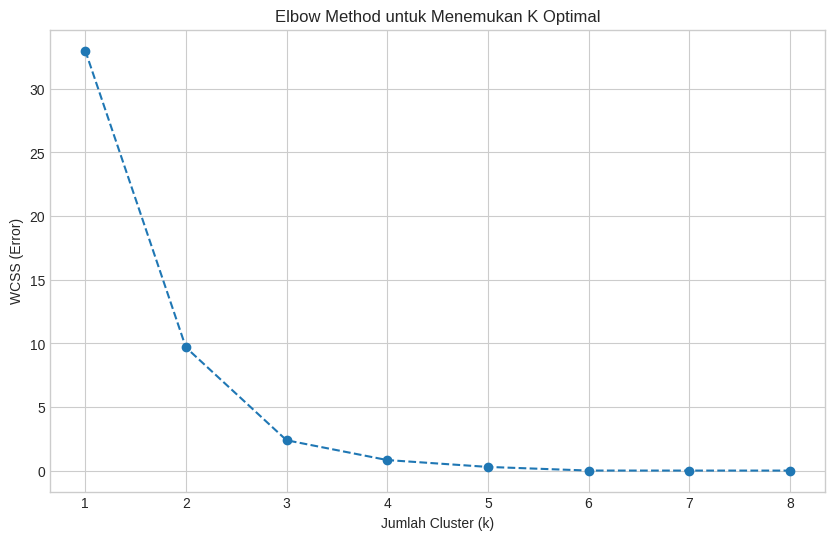

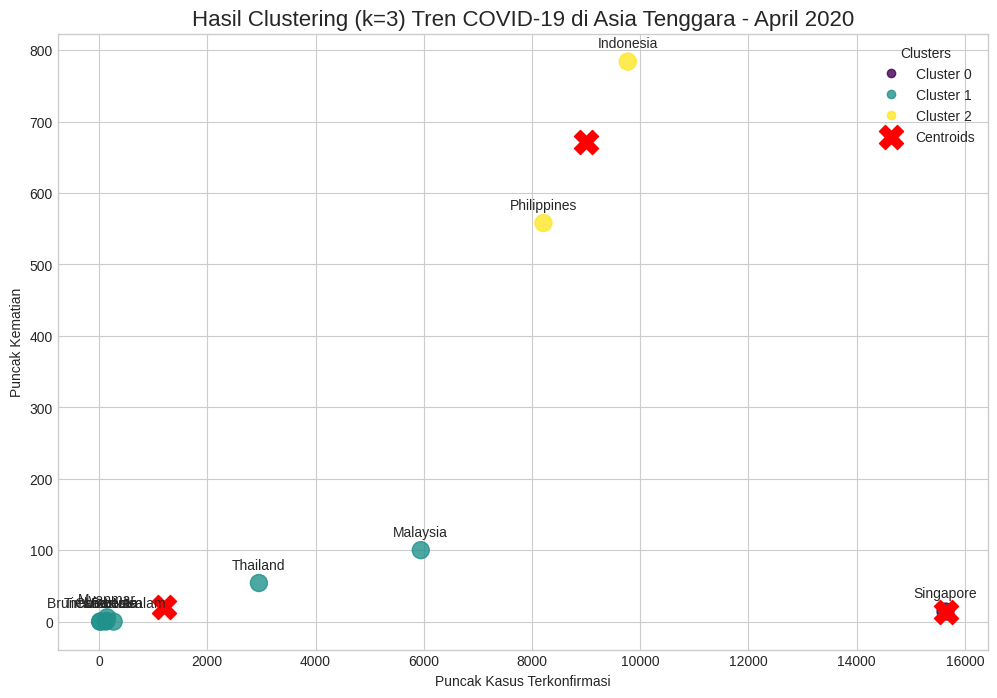


===== Hasil Akhir Pengelompokan Negara berdasarkan Tren Bulanan =====

--- Cluster 0 ---
Singapore

--- Cluster 1 ---
Brunei Darussalam, Cambodia, Laos, Malaysia, Myanmar, Thailand, Timor-Leste, Viet Nam

--- Cluster 2 ---
Indonesia, Philippines


In [ ]:
df_summary = df.groupby('location').agg(
    kasus_maksimal = pd.NamedAgg(column='total_cases', aggfunc='max'),
    kematian_maksimal = pd.NamedAgg(column='total_deaths', aggfunc='max'),
    pertumbuhan_kasus = pd.NamedAgg(column='total_cases', aggfunc=lambda x: x.max() - x.min())
).reset_index()
print(df_summary)
from sklearn.preprocessing import StandardScaler

# Seleksi Fitur
features = df_summary[['kasus_maksimal', 'kematian_maksimal', 'pertumbuhan_kasus']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Cari juma=lah K Optimal
wcss = []
k_range = range(1, 9)
for i in k_range:
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.title('Elbow Method untuk Menemukan K Optimal')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('WCSS (Error)')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# KMeans
optimal_k = 3
kmeans_final = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
df_summary['cluster'] = kmeans_final.fit_predict(features_scaled)

# Visualisasi Hasil Cluster
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    df_summary['kasus_maksimal'],
    df_summary['kematian_maksimal'],
    c=df_summary['cluster'],
    cmap='viridis',
    s=150,
    alpha=0.8
)

centroids_scaled = kmeans_final.cluster_centers_
centroids_original_scale = scaler.inverse_transform(centroids_scaled)
plt.scatter(
    centroids_original_scale[:, 0],
    centroids_original_scale[:, 1],
    s=300,
    c='red',
    marker='X',
    label='Centroids'
)


# Menambahkan nama negara di setiap titik
for i, row in df_summary.iterrows():
    plt.annotate(row['location'], (row['kasus_maksimal'], row['kematian_maksimal']), textcoords="offset points", xytext=(0,10), ha='center')

plt.title(f'Hasil Clustering (k={optimal_k}) Tren COVID-19 di Asia Tenggara - April 2020', fontsize=16)
plt.xlabel('Puncak Kasus Terkonfirmasi')
plt.ylabel('Puncak Kematian')
plt.legend(handles=scatter.legend_elements()[0] + [plt.gca().get_legend_handles_labels()[0][-1]], labels=[f'Cluster {i}' for i in range(optimal_k)] + ['Centroids'], title="Clusters")
plt.grid(True)
plt.show()

print("\n===== Hasil Akhir Pengelompokan Negara berdasarkan Tren Bulanan =====")
for i in range(optimal_k):
    print(f"\n--- Cluster {i} ---")
    cluster_countries = df_summary[df_summary['cluster'] == i]['location'].tolist()
    print(", ".join(cluster_countries))